In [8]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

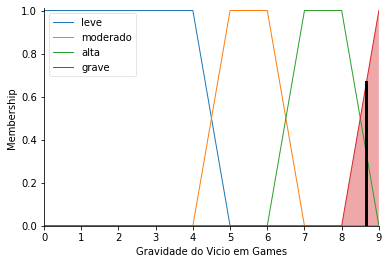

In [11]:
if __name__=="__main__":
  
  #variavel de entrada

  tempoJogo = ctrl.Antecedent(np.arange(0, 4, 1), "Tempo de Jogo")
  social = ctrl.Antecedent(np.arange(1,3, 1), "Afeta o estilo de Vida/Social")
  insonia = ctrl.Antecedent(np.arange(1,3, 1), "Diminuição do Tempo de Sono")
  irritabilidade = ctrl.Antecedent(np.arange(0,5, 1), "Irritabilidade")

  #variavel de saida

  gravidade = ctrl.Consequent(np.arange(0,10, 1), "Gravidade do Vicio em Games")

  #processo de fuzzificação!

  tempoJogo['pouco'] = fuzz.trimf(tempoJogo.universe, [0, 1, 2])
  tempoJogo['razoavel'] = fuzz.trimf(tempoJogo.universe, [1, 2, 3])
  tempoJogo['muito'] = fuzz.trimf(tempoJogo.universe, [2,3,3])

  social['sim'] = fuzz.trimf(social.universe, [2,2,2])
  social['não'] = fuzz.trimf(social.universe, [1, 1,1])  

  insonia['presente'] = fuzz.trimf(insonia.universe, [2, 2, 2])
  insonia['ausente'] = fuzz.trimf(insonia.universe, [1, 1, 1])

  irritabilidade['nenhuma'] = fuzz.trimf(irritabilidade.universe, [0, 1, 1])
  irritabilidade['moderada'] = fuzz.trimf(irritabilidade.universe, [1, 2, 3])
  irritabilidade['alta'] = fuzz.trimf(irritabilidade.universe, [2, 3, 4])

  gravidade['leve'] = fuzz.trapmf(gravidade.universe, [0,0 ,4, 4])
  gravidade['moderado'] = fuzz.trapmf(gravidade.universe, [4, 5, 6, 6])
  gravidade['alta'] = fuzz.trapmf(gravidade.universe, [6, 7, 8, 8])
  gravidade['grave'] = fuzz.trapmf(gravidade.universe, [8, 9, 10, 10])

  #definindo algumas regras...
  
  regra1 = ctrl.Rule(tempoJogo['pouco'] & social['não'] & insonia['ausente'] & irritabilidade['nenhuma'], gravidade['leve'])
  regra2 = ctrl.Rule(tempoJogo['razoavel'] & social['não']& insonia['ausente']& irritabilidade['nenhuma'], gravidade['moderado'])
  regra3 = ctrl.Rule(tempoJogo['muito'] & social['não'] & insonia['ausente'] & irritabilidade['nenhuma'], gravidade['moderado'])
  regra36 = ctrl.Rule(tempoJogo['muito'] & social['sim'] & insonia['presente'] & irritabilidade['alta'], gravidade['grave'])

  #ativação das regras

  controle_risco = ctrl.ControlSystem([regra1, regra2, regra3, regra36])
  simulador_risco = ctrl.ControlSystemSimulation(controle_risco)

  simulador_risco.input['Tempo de Jogo'] = 3
  simulador_risco.input['Afeta o estilo de Vida/Social'] = 2
  simulador_risco.input['Diminuição do Tempo de Sono'] = 2
  simulador_risco.input['Irritabilidade'] = 3

  simulador_risco.compute()

  #printando(simulador_risco.output['gravidade'])
  
  gravidade.view(sim=simulador_risco)
  plt.show()